# SLR Practice

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import sklearn.metrics as metrics

import statsmodels.api as sm

from statsmodels.stats.stattools import durbin_watson


### Get the data

In [3]:
df = pd.read_csv('./data/train.csv')

I always fix my column names first. 

In [4]:
# list comp!
df.columns = [name.strip().lower().replace(' ','').replace('-','_') for name in df.columns]



In [5]:
# Check it out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

I'll create an SLR using one feature and `saleprice` as the target.

In [7]:
# Create target/output and features/input
X= df[['grlivarea']] #2 brackets gives us a Pandas dataframe. 1 bracket would give us a series
#
y=df.saleprice

In [ ]:
#We use a capitol X because we want a matrix. Lower case represents a vector

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
X.head()

,grlivarea
0,1710
1,1262
2,1786
3,1717
4,2198


In [10]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

### Assumption: Linear Relationship between feature and target

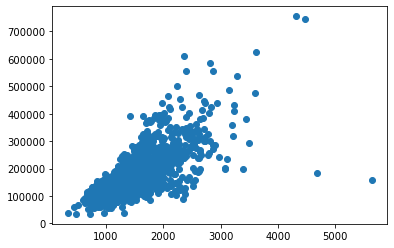

In [15]:
# Assumption #1. Check to see if there is a linear relationship
plt.scatter(X,y);

<AxesSubplot:xlabel='grlivarea', ylabel='saleprice'>

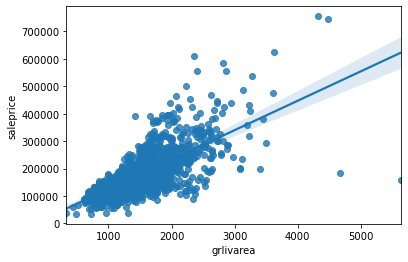

In [13]:
# another method sns.regplot
sns.regplot(x=X, y=y)

In [17]:
# Create a correct number of bins, and let's look at the distribution
bins = int (len(X)**.5)
bins

38

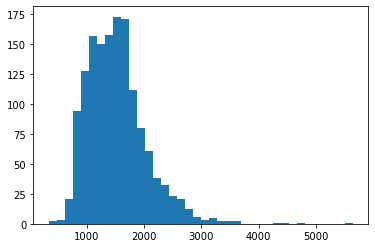

In [19]:
# And for Sale price, as well
plt.hist(X['grlivarea'], bins=bins);

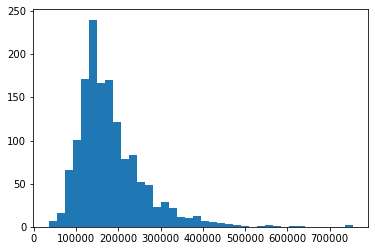

In [17]:
plt.hist(y, bins=bins);

What does this tell us?

In [19]:
tot_df = df[['grlivarea' , 'saleprice']]

In [20]:
tot_df.head()

,grlivarea,saleprice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


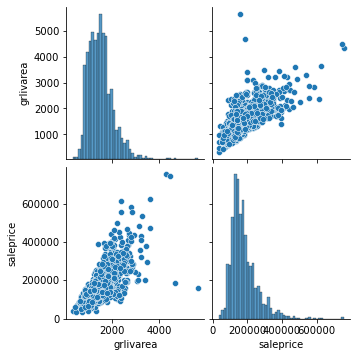

In [21]:
sns.pairplot(tot_df)

In [20]:
# statsmodel first
sm_lr = sm.OLS(y, sm.add_constant(X))

In [21]:
# Summary
sm_lr.fit().summary() b

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          4.52e-223
Time:                        21:32:14   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
grlivarea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# For the above problem when thinking of the equation for a line of y= m*x +b
# y = saleprice
# x = grlivarea
# m = 107 (our coef value for grlivarea) Slope
# b = 18570 (our coef value for the constant) Y intercept

### How do we compare this?

Baseline!

There's a [class](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) for it!

In [23]:
# Instantiate
dummy_lr = DummyRegressor()

In [24]:
# fit
dummy_lr.fit(X,y)

DummyRegressor()

In [25]:
# score
dummy_lr.score(X,y)

0.0

Well that's a relief. We're at least better then that.

### Error assumptions

#### Normally Distributed with a mean of 0

In [26]:
# Instantiate
sk_lr = LinearRegression()

In [27]:
# fit
sk_lr.fit(X,y)

LinearRegression()

In [28]:
# score
sk_lr.score(X,y)

0.5021486502718042

In [29]:
# predict
preds = sk_lr.predict(X)

In [30]:
# calculate residuals

preds

array([201761.93968805, 153767.53887136, 209903.84696945, ...,
       269254.06583652, 134055.55282165, 153124.75671756])

In [32]:
resids= y - preds

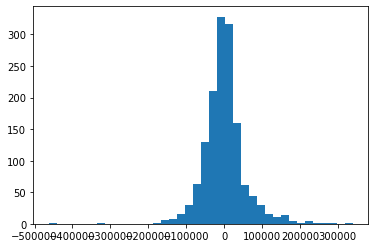

In [33]:
# Histogram of residuals
plt.hist(resids, bins=bins);

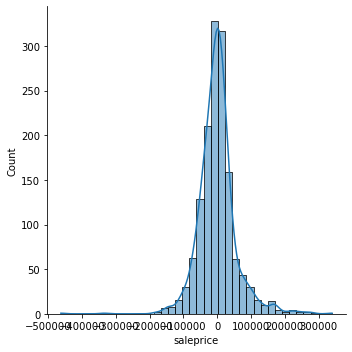

In [34]:
# sns
sns.displot(resids, bins=bins, kde=True)

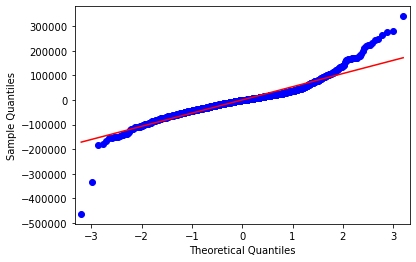

In [35]:
# QQ!

sm.qqplot(resids, line='r');

#### Thoughts?

#### Heteroskedacity

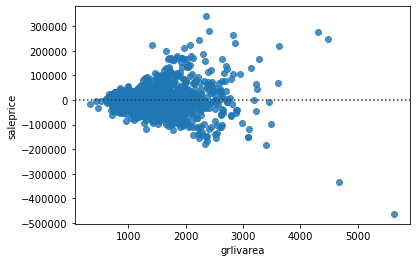

In [36]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

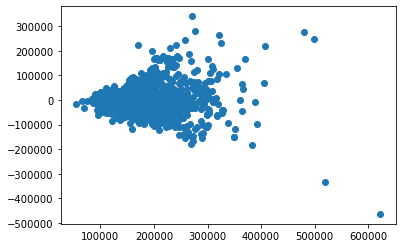

In [38]:
# scatter
plt.scatter(preds, resids);

#### Thoughts?

#### No autocorrelation in residuals

Hello, [Durbin-Watson!](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)

In [39]:
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(resids)

print('Durbin-Watson:', durbinWatson)

if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0246517708462295
Little to no autocorrelation 

Assumption satisfied


The above code was audaciously stolen from [this](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/) excellent article.

#### Thoughts?

## Your turn!

Your goal is find a feature or an interaction of features that outperforms this model. GO!

In [40]:
df.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
lotarea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
bsmtfinsf1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [49]:
X= df['overallqual']
y=df.saleprice

In [50]:
type(X)

pandas.core.series.Series

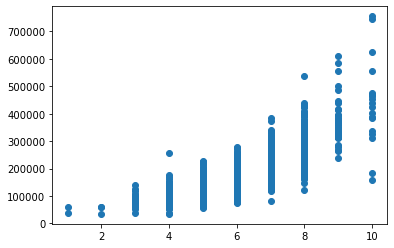

In [51]:
plt.scatter(X,y)

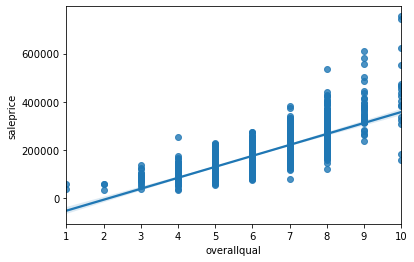

In [52]:
sns.regplot(x=X, y=y);

In [53]:
bins = int (len(X)**.5)
bins

38

(array([  2.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,  20.,   0.,   0.,
          0., 116.,   0.,   0.,   0., 397.,   0.,   0.,   0.,   0., 374.,
          0.,   0.,   0., 319.,   0.,   0.,   0., 168.,   0.,   0.,   0.,
         43.,   0.,   0.,   0.,  18.]),
 array([ 1.        ,  1.23684211,  1.47368421,  1.71052632,  1.94736842,
         2.18421053,  2.42105263,  2.65789474,  2.89473684,  3.13157895,
         3.36842105,  3.60526316,  3.84210526,  4.07894737,  4.31578947,
         4.55263158,  4.78947368,  5.02631579,  5.26315789,  5.5       ,
         5.73684211,  5.97368421,  6.21052632,  6.44736842,  6.68421053,
         6.92105263,  7.15789474,  7.39473684,  7.63157895,  7.86842105,
         8.10526316,  8.34210526,  8.57894737,  8.81578947,  9.05263158,
         9.28947368,  9.52631579,  9.76315789, 10.        ]),
 <BarContainer object of 38 artists>)

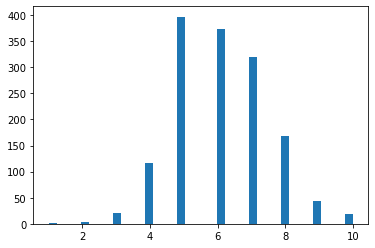

In [54]:
plt.hist (X, bins= bins)

In [ ]:
tot_df= df [['']]